In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers

data = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = data.load_data()

2022-12-15 16:22:19.859427: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-15 16:22:19.961196: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-15 16:22:20.408178: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.3/lib64
2022-12-15 16:22:20.408226: W tensorflow/compiler/xla/strea

In [3]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
              'dog', 'frog', 'horse', 'ship', 'truck']

# 1번

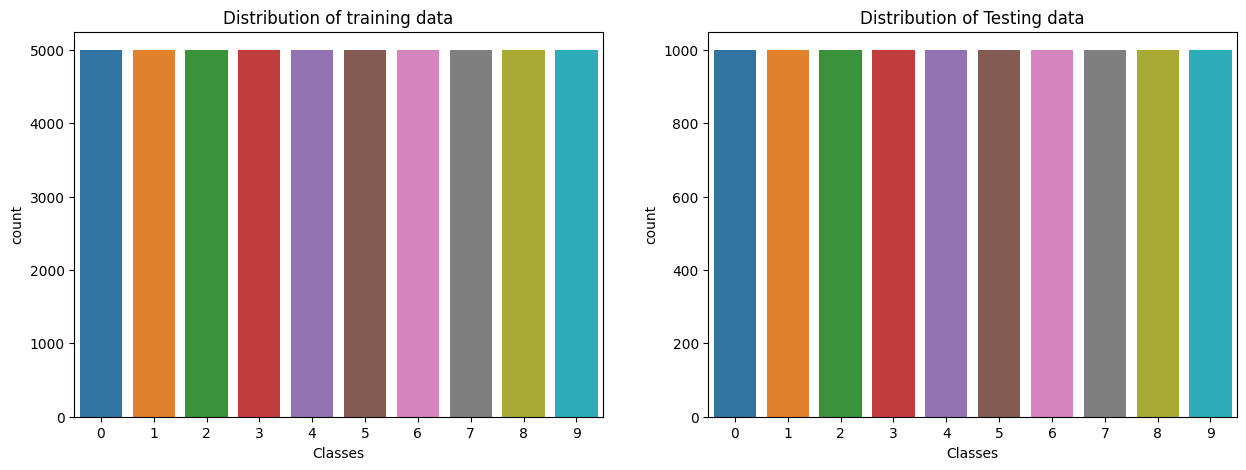

In [31]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
# Count plot for training set
sns.countplot(x=y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(x= y_test.ravel(),ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

# 2번

In [5]:
import numpy as np
import random


samples = random.choices(population = range(0, len(y_train)), k=30)

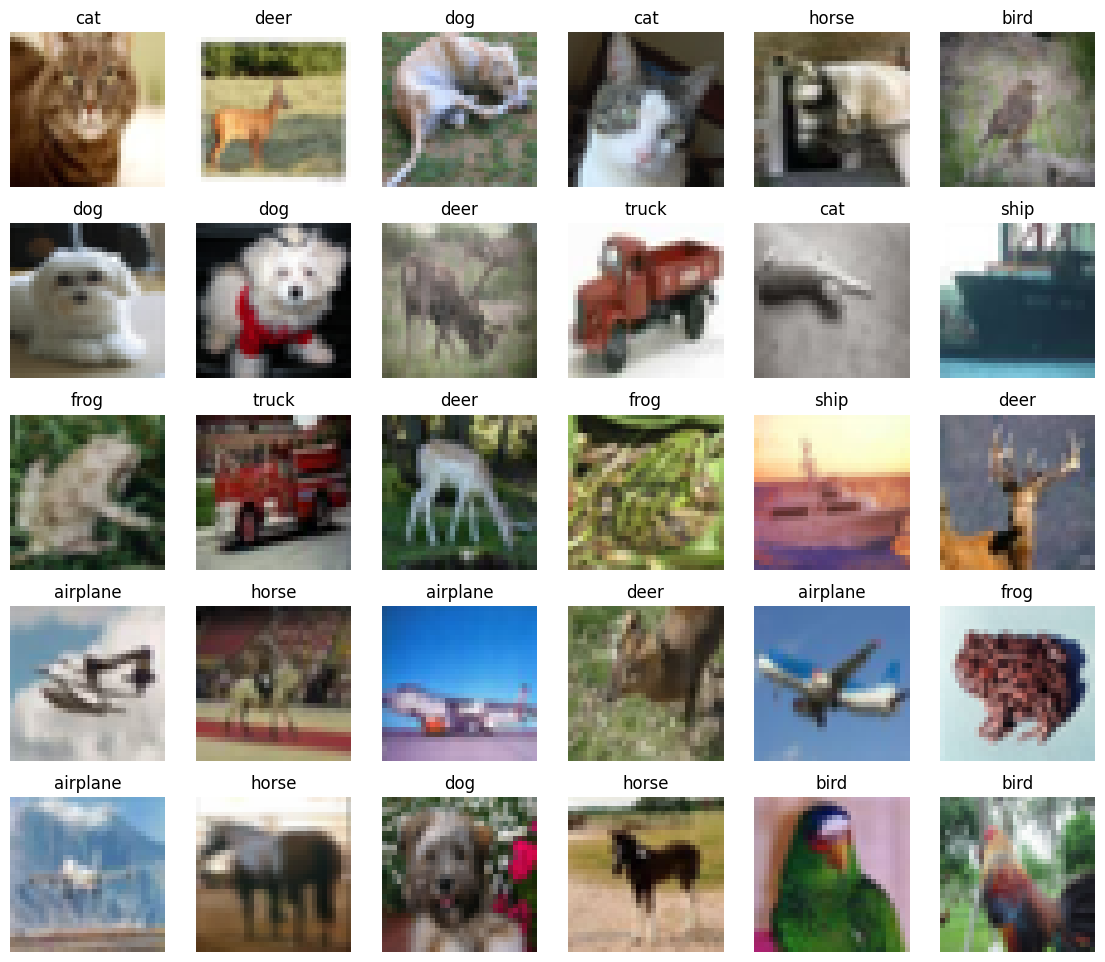

In [6]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(5, 6, idx+1)
    plt.imshow(X_train[n], cmap='Greys', interpolation='nearest')
    plt.title(str(class_name[int(y_train[n])]))
    plt.axis('off')

plt.show()

# 문제 3번 normalize

In [7]:
X_train, X_test = X_train / 255.0 , X_test / 255.0
print(X_test[0])

[[[0.61960784 0.43921569 0.19215686]
  [0.62352941 0.43529412 0.18431373]
  [0.64705882 0.45490196 0.2       ]
  ...
  [0.5372549  0.37254902 0.14117647]
  [0.49411765 0.35686275 0.14117647]
  [0.45490196 0.33333333 0.12941176]]

 [[0.59607843 0.43921569 0.2       ]
  [0.59215686 0.43137255 0.15686275]
  [0.62352941 0.44705882 0.17647059]
  ...
  [0.53333333 0.37254902 0.12156863]
  [0.49019608 0.35686275 0.1254902 ]
  [0.46666667 0.34509804 0.13333333]]

 [[0.59215686 0.43137255 0.18431373]
  [0.59215686 0.42745098 0.12941176]
  [0.61960784 0.43529412 0.14117647]
  ...
  [0.54509804 0.38431373 0.13333333]
  [0.50980392 0.37254902 0.13333333]
  [0.47058824 0.34901961 0.12941176]]

 ...

 [[0.26666667 0.48627451 0.69411765]
  [0.16470588 0.39215686 0.58039216]
  [0.12156863 0.34509804 0.5372549 ]
  ...
  [0.14901961 0.38039216 0.57254902]
  [0.05098039 0.25098039 0.42352941]
  [0.15686275 0.33333333 0.49803922]]

 [[0.23921569 0.45490196 0.65882353]
  [0.19215686 0.4        0.58039216]


# 문제4. Sequntial모델을 conv2D, MaxPooling, Drop out, relu, Softmax, Flatten 등을 사용하여 자유롭게 3층 신경망 이상을 구현하고 model 정보를 추출해주세요.

In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from tensorflow.keras.layers import GlobalMaxPool2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
from sklearn.model_selection import train_test_split

X_train_data, X_val_data, y_train_data, y_val_data  = train_test_split(X_train, y_train, test_size=0.2, random_state = 13)

In [10]:
from tensorflow.keras import layers, models

In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(10, activation='softmax')
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0

2022-12-15 16:22:22.496463: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 16:22:22.500615: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 16:22:22.501217: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 16:22:22.502163: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operati

In [12]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
import time
start_time = time.time()
hist = model.fit(X_train_data, y_train_data, validation_data=(X_val_data, y_val_data), 
                 epochs=100, batch_size=50, verbose=1)
print('Fit time : ', time.time() - start_time)

Epoch 1/100


2022-12-15 16:22:24.462030: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2022-12-15 16:22:25.027592: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8201
2022-12-15 16:22:26.356653: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-12-15 16:22:26.357759: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f482cdc5720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-12-15 16:22:26.357773: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2022-12-15 16:22:26.360749: I tensorflow/compiler/mlir/tensorflow/utils/du

800/800 [==============================] - 7s 4ms/step - loss: 1.6500 - accuracy: 0.3959 - val_loss: 1.3072 - val_accuracy: 0.5374
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 1.2854 - accuracy: 0.5383 - val_loss: 1.1812 - val_accuracy: 0.5794
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 1.1395 - accuracy: 0.5922 - val_loss: 0.9683 - val_accuracy: 0.6578
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 1.0310 - accuracy: 0.6319 - val_loss: 0.9369 - val_accuracy: 0.6761
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 0.9727 - accuracy: 0.6568 - val_loss: 0.8636 - val_accuracy: 0.6978
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 0.9202 - accuracy: 0.6751 - val_loss: 0.8538 - val_accuracy: 0.6985
Epoch 7/100
800/800 [==============================] - 2s 3ms/step - loss: 0.8647 - accuracy: 0.6945 - val_loss: 0.7942 - val_accuracy: 0.7251
Epoch 8/100

800/800 [==============================] - 3s 3ms/step - loss: 0.3928 - accuracy: 0.8634 - val_loss: 0.6983 - val_accuracy: 0.7793
Epoch 59/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3870 - accuracy: 0.8643 - val_loss: 0.7354 - val_accuracy: 0.7650
Epoch 60/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3848 - accuracy: 0.8674 - val_loss: 0.7434 - val_accuracy: 0.7738
Epoch 61/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3849 - accuracy: 0.8642 - val_loss: 0.7153 - val_accuracy: 0.7711
Epoch 62/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3842 - accuracy: 0.8655 - val_loss: 0.7189 - val_accuracy: 0.7747
Epoch 63/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3820 - accuracy: 0.8665 - val_loss: 0.7235 - val_accuracy: 0.7715
Epoch 64/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3837 - accuracy: 0.8663 - val_loss: 0.6907 - val_accuracy: 0.7814
Epoch

# 문제 6 history 결과물을 pandas DataFrame으로 저장해주세요.

In [14]:
hist_df = pd.DataFrame(hist.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,1.650023,0.395925,1.307182,0.5374
1,1.285396,0.538350,1.181170,0.5794
2,1.139506,0.592225,0.968261,0.6578
3,1.031009,0.631925,0.936873,0.6761
4,0.972656,0.656750,0.863576,0.6978
...,...,...,...,...
95,0.334373,0.883275,0.771625,0.7676
96,0.337802,0.883475,0.769439,0.7695
97,0.343525,0.883975,0.722692,0.7793
98,0.336987,0.883625,0.785482,0.7637


# 7 Accuracy, Loss그래프를 그려주세요.

<AxesSubplot: >

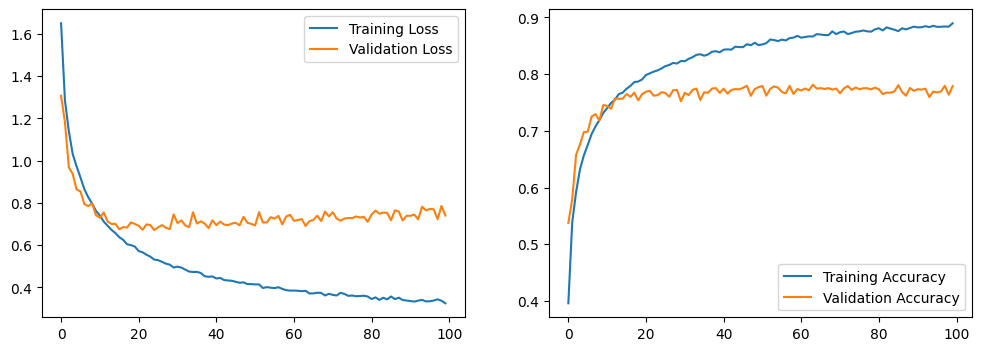

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(x = range(len(hist.history["loss"])),
             y = hist.history["loss"], ax = axes[0],
             label = "Training Loss")

sns.lineplot(x = range(len(hist.history["loss"])),
             y = hist.history["val_loss"], ax = axes[0],
             label = "Validation Loss")

sns.lineplot(x = range(len(hist.history["accuracy"])),
             y = hist.history["accuracy"], ax = axes[1],
             label = "Training Accuracy")

sns.lineplot(x = range(len(hist.history["accuracy"])),
             y = hist.history["val_accuracy"], ax = axes[1],
             label = "Validation Accuracy")

# 8-1 model.evaluat을 이용하여 현재 모델의 loss와 accuracy를 구하고 이를 기주느올 더 좋은 기능의 성능의 모델을 만들어보세요.

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7686 - accuracy: 0.7691


[0.768622875213623, 0.76910001039505]

# 사진의 크기를 더 키워볼까?

In [27]:
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(10, activation='softmax')
    
])

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_23 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 512)       147968    
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 8, 8, 512)        0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 8, 8, 512)        

In [28]:
model2.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [29]:
from sklearn.model_selection import train_test_split

X_train_data2, X_val_data2, y_train_data2, y_val_data2  = train_test_split(X_train, y_train, test_size=0.2, random_state = 13)

In [30]:
import time
start_time = time.time()
hist2 = model2.fit(X_train_data2, y_train_data2, validation_data=(X_val_data2, y_val_data2), 
                 epochs=100, batch_size=50, verbose=1)
print('Fit time : ', time.time() - start_time)

Epoch 1/100


2022-12-15 16:38:19.781698: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/dropout_23/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


800/800 [==============================] - 13s 14ms/step - loss: 1.6347 - accuracy: 0.3949 - val_loss: 1.2416 - val_accuracy: 0.5469
Epoch 2/100
800/800 [==============================] - 12s 15ms/step - loss: 1.2265 - accuracy: 0.5612 - val_loss: 1.0780 - val_accuracy: 0.6109
Epoch 3/100
800/800 [==============================] - 12s 15ms/step - loss: 1.0511 - accuracy: 0.6279 - val_loss: 0.9204 - val_accuracy: 0.6775
Epoch 4/100
800/800 [==============================] - 11s 14ms/step - loss: 0.9413 - accuracy: 0.6642 - val_loss: 0.8542 - val_accuracy: 0.6985
Epoch 5/100
800/800 [==============================] - 12s 14ms/step - loss: 0.8677 - accuracy: 0.6942 - val_loss: 0.7693 - val_accuracy: 0.7284
Epoch 6/100
800/800 [==============================] - 12s 15ms/step - loss: 0.8111 - accuracy: 0.7116 - val_loss: 0.7550 - val_accuracy: 0.7297
Epoch 7/100
800/800 [==============================] - 12s 15ms/step - loss: 0.7681 - accuracy: 0.7276 - val_loss: 0.7291 - val_accuracy: 0.74

800/800 [==============================] - 12s 14ms/step - loss: 0.3881 - accuracy: 0.8716 - val_loss: 0.7437 - val_accuracy: 0.7826
Epoch 58/100
800/800 [==============================] - 12s 14ms/step - loss: 0.3899 - accuracy: 0.8688 - val_loss: 0.6809 - val_accuracy: 0.7921
Epoch 59/100
800/800 [==============================] - 12s 15ms/step - loss: 0.3956 - accuracy: 0.8700 - val_loss: 0.7241 - val_accuracy: 0.7929
Epoch 60/100
800/800 [==============================] - 12s 14ms/step - loss: 0.3854 - accuracy: 0.8722 - val_loss: 0.7138 - val_accuracy: 0.7820
Epoch 61/100
800/800 [==============================] - 12s 14ms/step - loss: 0.3837 - accuracy: 0.8732 - val_loss: 0.7094 - val_accuracy: 0.7903
Epoch 62/100
800/800 [==============================] - 12s 14ms/step - loss: 0.3858 - accuracy: 0.8742 - val_loss: 0.7223 - val_accuracy: 0.7889
Epoch 63/100
800/800 [==============================] - 12s 14ms/step - loss: 0.3810 - accuracy: 0.8731 - val_loss: 0.7213 - val_accuracy

In [32]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8376 - accuracy: 0.7862


[0.8376079201698303, 0.7861999869346619]

## loss는 증가했지만 accuracy는 0.2 올랐다.

<AxesSubplot: >

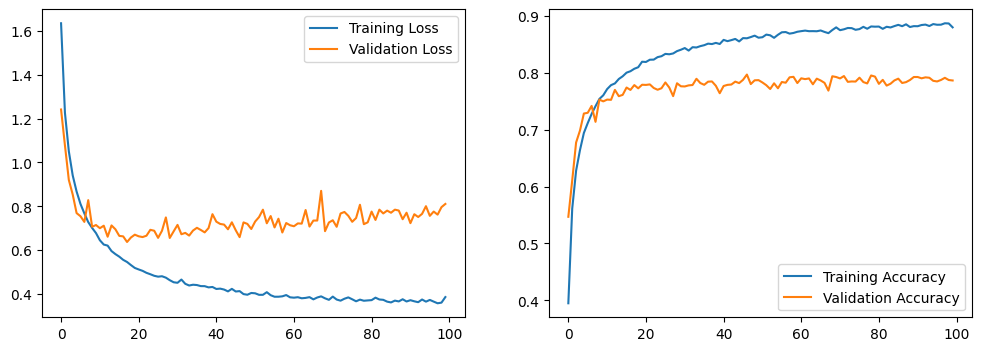

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.lineplot(x = range(len(hist2.history["loss"])),
             y = hist2.history["loss"], ax = axes[0],
             label = "Training Loss")

sns.lineplot(x = range(len(hist2.history["loss"])),
             y = hist2.history["val_loss"], ax = axes[0],
             label = "Validation Loss")

sns.lineplot(x = range(len(hist2.history["accuracy"])),
             y = hist2.history["accuracy"], ax = axes[1],
             label = "Training Accuracy")

sns.lineplot(x = range(len(hist2.history["accuracy"])),
             y = hist2.history["val_accuracy"], ax = axes[1],
             label = "Validation Accuracy")

In [41]:
prediction.shape, y_test.shape

((10000, 10), (10000, 1))

In [44]:
from sklearn.metrics import classification_report
y_pred = model2.predict(X_test, verbose=0)
prediction = y_pred.argmax(axis=1)

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1000
           1       0.91      0.90      0.90      1000
           2       0.73      0.71      0.72      1000
           3       0.61      0.57      0.59      1000
           4       0.68      0.84      0.75      1000
           5       0.78      0.59      0.67      1000
           6       0.71      0.90      0.79      1000
           7       0.89      0.81      0.85      1000
           8       0.85      0.90      0.88      1000
           9       0.90      0.85      0.88      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.78     10000
weighted avg       0.79      0.79      0.78     10000



# 10. 예측값과 틀린 데이터를 찾고 그 데이터들로 아래와 같이 만들어주세요.

In [48]:
predicted_result = model2.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 1s 3ms/step


array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

In [49]:
y_test[:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)

In [50]:
wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

2138

In [56]:
import random

samples = random.choices(population = wrong_result, k = 16)
samples

[7582,
 4584,
 7217,
 4967,
 5128,
 356,
 8847,
 3693,
 888,
 3297,
 7529,
 2017,
 4556,
 4112,
 7784,
 9468]

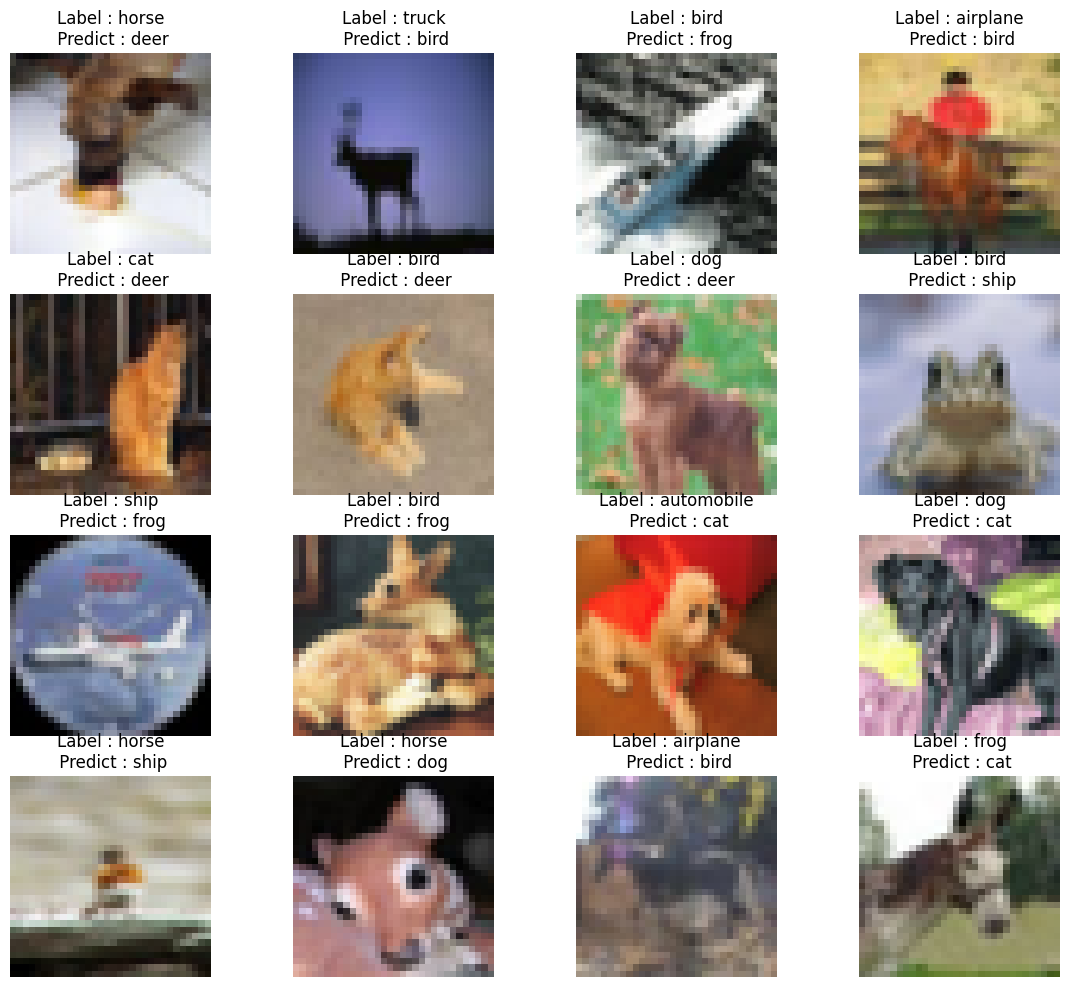

In [57]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n], cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(class_name[int(y_train[n])]) +'\n Predict : ' + str(class_name[int(predicted_labels[n])]) )
    plt.axis('off')
    
plt.show()

In [59]:
model2.save('./my_model.h5')
from tensorflow import keras
loaded_model = keras.models.load_model('./my_model.h5')
loaded_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_23 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 512)       147968    
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 8, 8, 512)        0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 8, 8, 512)        